In [6]:
from Tools import *
import numpy as np
import matplotlib.pyplot as plt
import pandas
import glob

MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask1.csv',sep=";"))[0]
Spec = readDataLBG("large_files/Reduced_Data/Mask1/2D/noiseCorrected/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)

def SideMask(NonDetectSpec):
    SideA,SideB=[],[]
    for s in NonDetectSpec:
        if s.Data.header["SIDE"]=="A":
            SideA.append(True)
            SideB.append(False)
        elif s.Data.header["SIDE"]=="B":
            SideA.append(False)
            SideB.append(True)
    return SideA,SideB

def Plot_median_sky(Spec):
    Sky=[]
    for s in Spec:
        Dat   = np.nanmedian(s.Data.rawData[3:-3,:],axis=0)
        Sky.append(Dat)
    return np.nanmedian(Sky ,axis=0)

def Plot_median_SkyandNoise(Spec):
    Sky=[]
    Noise=[]
    for s in Spec:
        Dat   = np.nanmedian(s.Data.rawData[3:-3,:],axis=0)
        Err   = np.nanmedian(s.Data.error[3:-3,:]  ,axis=0)
        Sky.append(Dat)
        Noise.append(Err)
    return np.nanmedian( Sky,axis=0),np.nanmedian(Noise,axis=0)


def Plot_median_SN(Spec):
    SN=[]
    for s in Spec:
        Dat   = np.nanmedian(s.Data.rawData[3:-3,:],axis=0)
        Err   = np.nanmedian(s.Data.error[3:-3,:]  ,axis=0)
        SN.append(Dat/Err)
    return np.nanmedian(SN ,axis=0)


def StoN_calculation(Spec,wave):
    Mus,Sigs=[],[]
    for s in Spec:
        Wavemask= ( (wave > 7638.) & (wave < 7707.) ) | ( (wave > 7893.) & (wave < 7908.) ) | ( (wave > 8106.) & (wave < 8271.) ) \
        | ( (wave > 8314.) & (wave < 8337.) ) | ( (wave > 8469.) & (wave < 8489.) ) | ( (wave > 8508.) & (wave < 8534.) ) \
        | ( (wave > 8552.) & (wave < 8754.) ) | ( (wave > 8795.) & (wave < 8821.) ) | ( (wave > 9006.) & (wave < 9300.) ) \
        | ( (wave > 9571.) & (wave < 9603.) ) | ( (wave > 9625.) & (wave < 9665.) ) | ( (wave > 9749.) & (wave < 9785.) )  
        #Wavemask=(wave > 9860.) & (wave < 9984.)
        EmptyData   = s.Data.rawData[3:-3,Wavemask]  
        EmptyErr   = s.Data.error[3:-3,Wavemask]
        
        value,b,_=plt.hist(EmptyData.flatten()[EmptyData.flatten()!=0.0]/EmptyErr.flatten()[EmptyData.flatten()!=0.0],bins=60,range=[-5,5])
        # Divide the values by the standard deviation i get
        plt.clf()
        
        bins=[(b[i]+b[i+1])/2 for i in range(0,len(b)-1)]

        plt.step(bins,value/max(value),where="mid")
        valueErrs=np.ones(len(value))*0.01
        vals=FitGaussian(bins,value/max(value),valueErrs,0.1,0,0.5,0)
        plt.plot(bins,gaussian_ML(bins,*vals))
        Mus.append(vals[1])
        Sigs.append(vals[2])
        plt.show()
    Mus=np.array(Mus)
    Sigs=np.array(Sigs)
    return Mus,Sigs


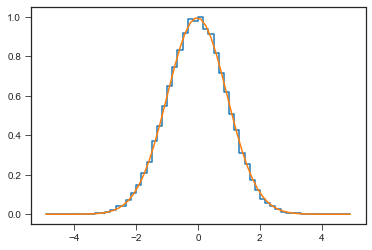

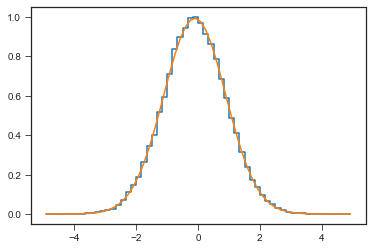

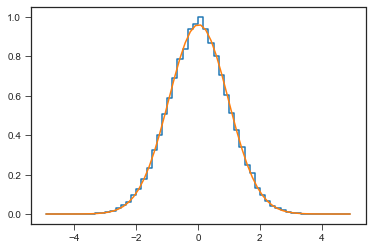

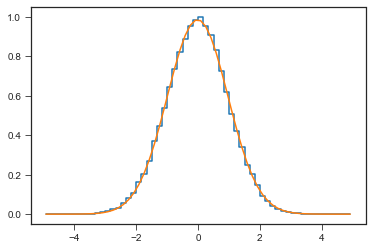

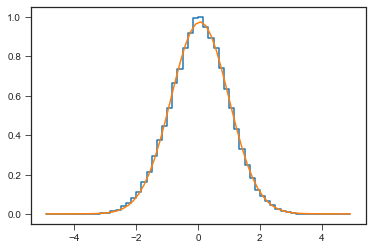

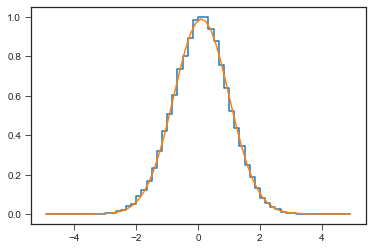

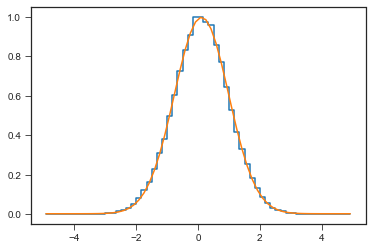

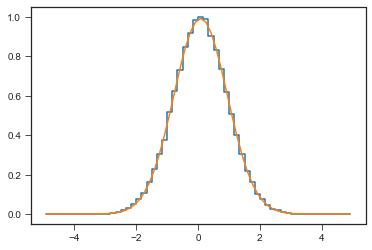

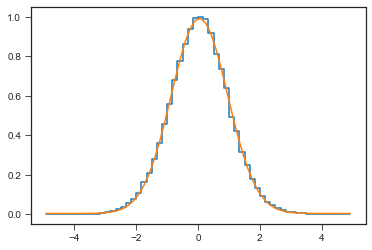

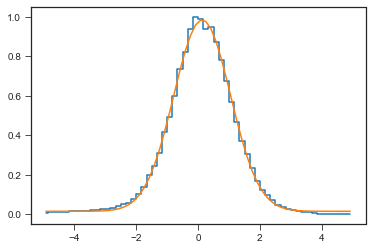

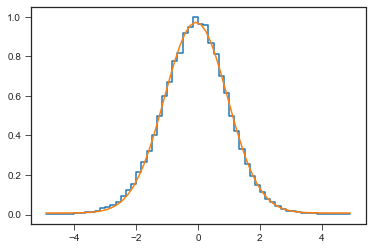

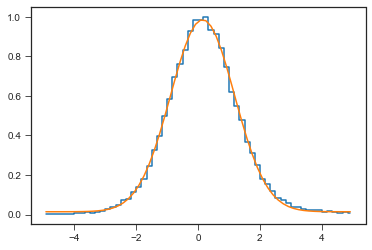

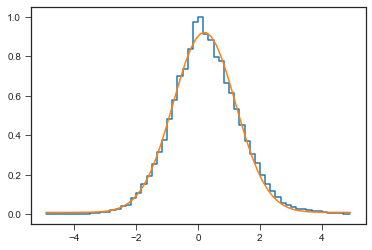

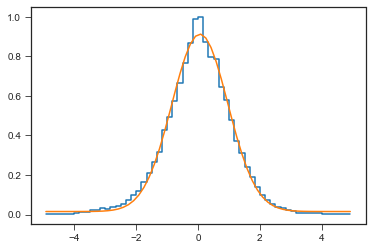

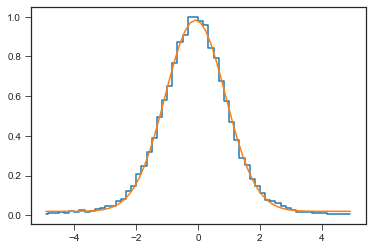

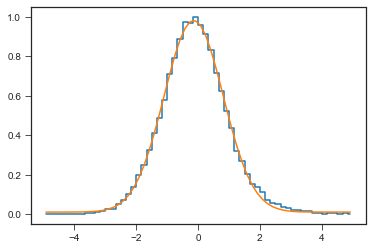

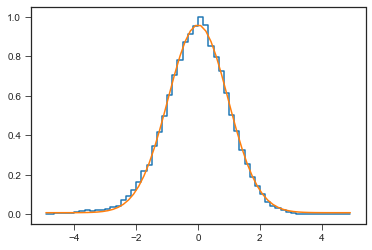

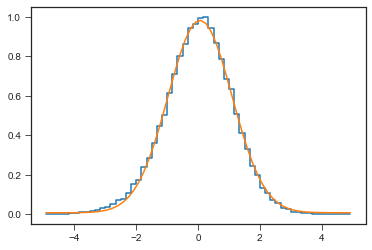

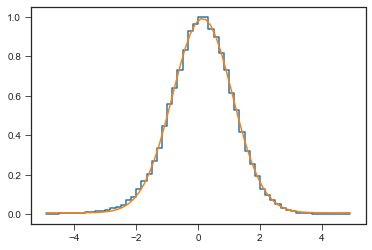

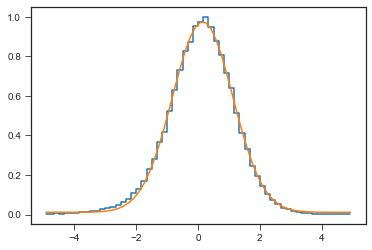

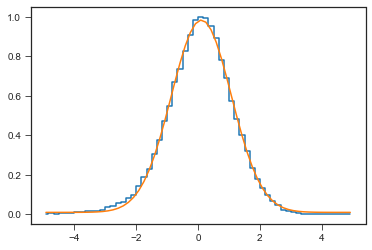

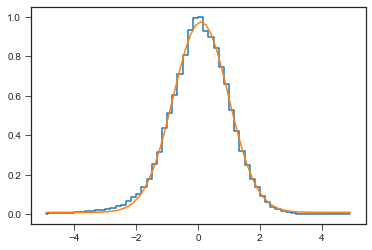

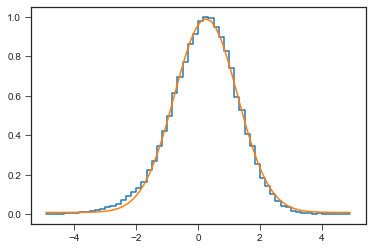

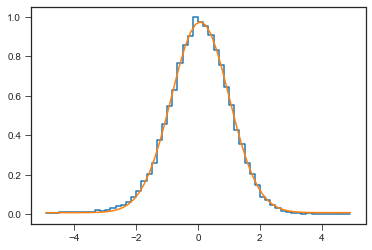

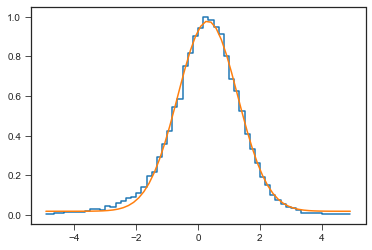

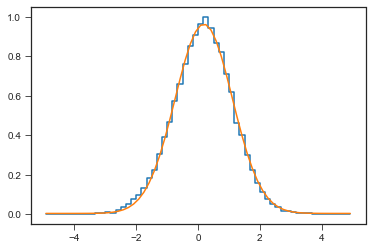

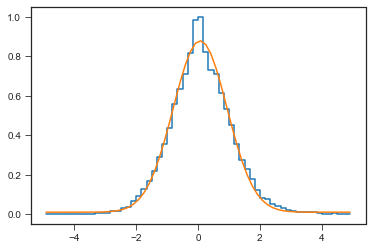

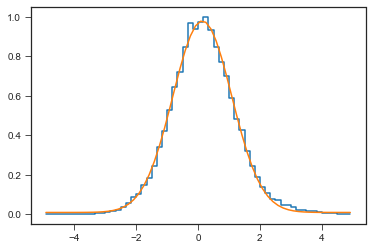

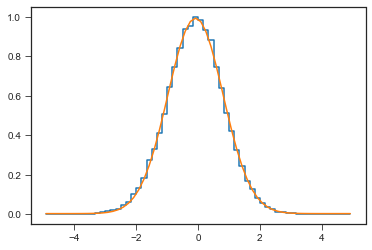

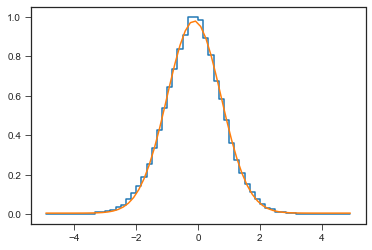

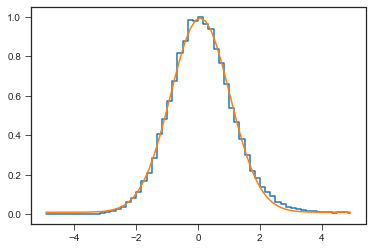

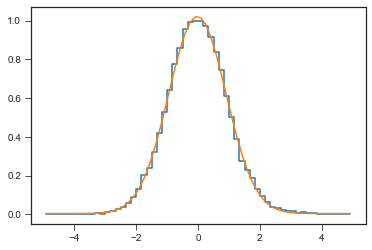

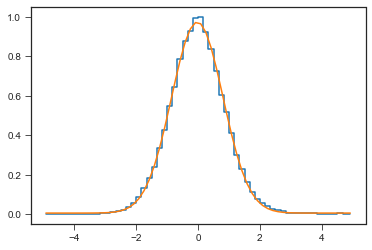

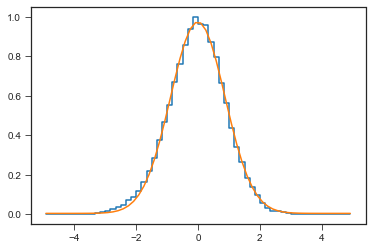

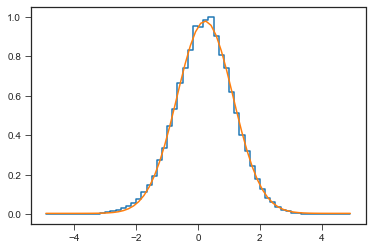

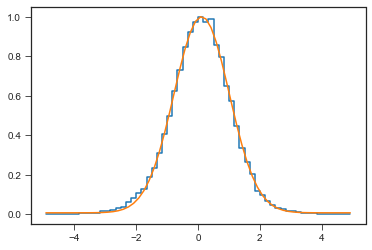

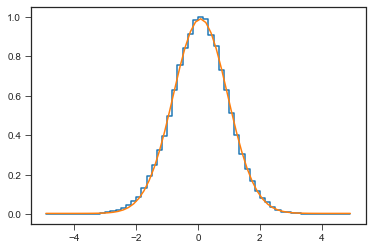

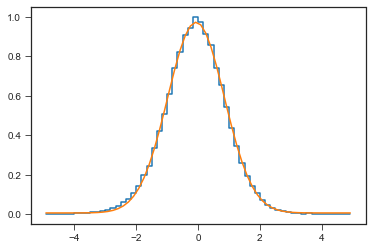

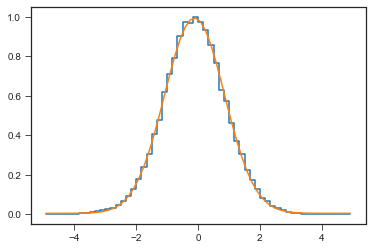

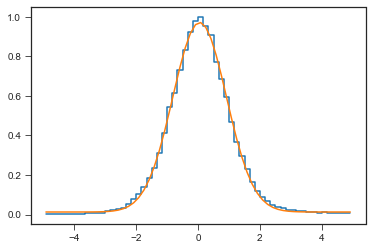

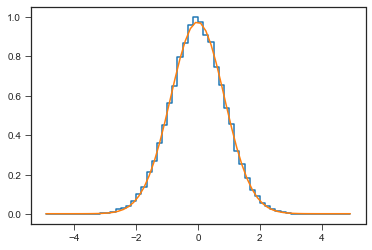

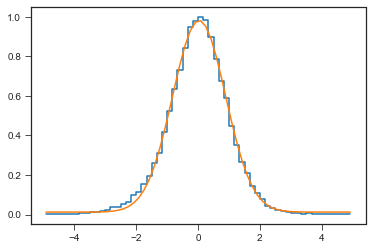

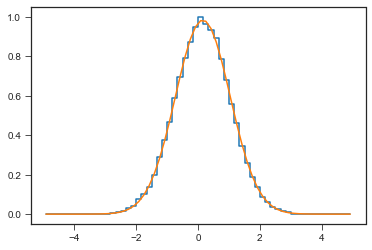

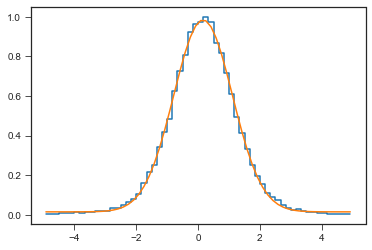

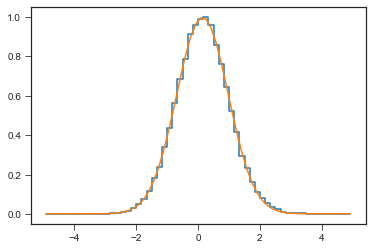

In [7]:
SideA,SideB=SideMask(NonDetectSpec)
Mus,Sigs=StoN_calculation(NonDetectSpec,wave)

0.0658291548233306
0.10428052547808689


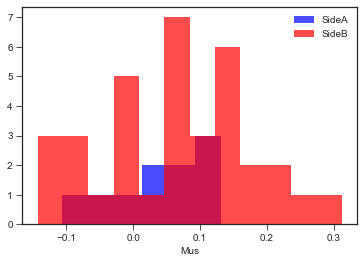

In [8]:
plt.hist(Mus[SideA],bins=6,color="blue",alpha=0.7,label="SideA")
plt.hist(Mus[SideB],bins=12,color="red",alpha=0.7,label="SideB")
print(np.median(Mus))
print(np.std(Mus))
plt.xlabel("Mus")
plt.legend()
plt.show()

In [9]:
print(max(Mus))
print(min(Mus))
print(np.median(Mus))

0.3119676803516163
-0.14291833671461435
0.0658291548233306


0.9294784824936031
0.05279646209859238


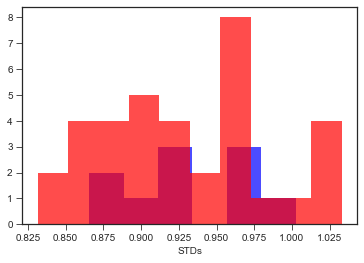

In [10]:
plt.hist(np.abs(Sigs[SideA]),bins=6,color="blue",alpha=0.7)
plt.hist(np.abs(Sigs[SideB]),bins=10,color="red",alpha=0.7)
print(np.mean(np.abs(Sigs[SideA])))
print(np.std(Sigs))
plt.xlabel("STDs")
plt.show()

In [ ]:
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_1=Plot_median_sky(NonDetectSpec)
plt.plot(wave,Sky_1,label="Mask1")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_2=Plot_median_sky(NonDetectSpec)
#plt.plot(wave,Sky_2,label="Mask2")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_2.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_2/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_3=Plot_median_sky(NonDetectSpec)
#plt.plot(wave,Sky_3,label="Mask3")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_3.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_3/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_4=Plot_median_sky(NonDetectSpec)
#plt.plot(wave,Sky_4,label="Mask4")
plt.legend()
plt.ylim(-0.1e-18,0.2e-18)
plt.xlabel("Wavelength")
plt.ylabel("Flux Units")
plt.title("Median Sky in each mask for NonDetections")
plt.show()

MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_1=Plot_median_SN(NonDetectSpec)
plt.plot(wave,Sky_1,label="Mask1")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_2=Plot_median_SN(NonDetectSpec)
plt.plot(wave,Sky_2,label="Mask2")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_2.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_2/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_3=Plot_median_SN(NonDetectSpec)
plt.plot(wave,Sky_3,label="Mask3")
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_3.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_3/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_4=Plot_median_SN(NonDetectSpec)
plt.plot(wave,Sky_4,label="Mask4")
plt.legend()
plt.ylim()
plt.xlabel("Wavelength")
plt.ylabel("StoN")
plt.title("Median S/N in each mask for NonDetections")
plt.show()

In [ ]:
MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_1,Noise_1=Plot_median_SkyandNoise(NonDetectSpec)
plt.plot(wave,Sky_1,label="Mask1")
plt.plot(wave,Noise_1,label="Mask1noise")


MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_1.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_1/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_2,Noise_2=Plot_median_SkyandNoise(NonDetectSpec)
plt.plot(wave,Sky_2,label="Mask2")
plt.plot(wave,Noise_2,label="Mask2noise")


MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_2.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_2/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_3,Noise_3=Plot_median_SkyandNoise(NonDetectSpec)
#plt.plot(wave,Sky_3,label="Mask3")
#plt.plot(wave,Noise_3,label="Mask3noise")



MasknonDetect    =   nonDetections(pandas.read_csv('../Docs/Mask2_3.csv',sep=";"))
Spec = readData("large_files/Reduced_Data/Mask2_3/2D/*.fits")
NonDetectSpec   =   Spec[MasknonDetect]
Sky_4,Noise_4=Plot_median_SkyandNoise(NonDetectSpec)
#plt.plot(wave,Sky_4,label="Mask4")
#plt.plot(wave,Noise_4,label="Mask4noise")

plt.legend()
plt.ylim(-0.1e-18,0.5e-18)
plt.xlabel("Wavelength")
plt.ylabel("Flux Units")
plt.title("Median Sky in each mask for NonDetections")
plt.show()